# Map projection & distortion visualisation

This notebook is complementing and supporting (e.g. with some of the iconography) the CRS presentation at the 2023 Winter School.

It requires some more markdown, and it is subject to improvement and reshuffling. Perhaps opening issues is an idea, or modifying and PR. 

Regardless, if you find any mistake, please let [@aprossi](https://github.com/aprossi) know, and he will try and fix it, or at least note it down.

In [32]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
# # warnings.filterwarnings(action='once')


## Symbols

From Snyder (1987): 

<div class="alert alert-block alert-info">  
    
$x =$ rectangular coordinate: distance to the right of the vertical line (Y axis)  passing through the origin or center of a projection (if negative, it is distance to the left). In practice, a "false" x or "false easting'' is frequently added to all values of x to eliminate negative numbers

$y =$ rectangular coordinate: distance above the horizontal line (X axis) passing through the origin or center of a projection (if negative, it is distance below). In practice, a "false" y or "false northing" is frequently added to all values of y to eliminate negative numbers.

$h =$ relative scale factor along a meridian of longitude. (For general perspective projections, h is height above surface of ellipsoid.)

$k =$ relative scale factor along a parallel of latitude

$\lambda = $ longitude east

$\lambda _{0} =$ longitude east of the central meridian of the map, or of the origin of the rectangular coordinates (for west longitude, use a minus sign). 

$\phi = $ north geodetic or geographic latitude (if latitude is south, apply a minus sign).

$\phi _{1} =$ single standard parallel on cylindrical or conic projections; latitude of central point on azimuthal projections.
    
$\theta _{1} =$ angle of intersection between meridian and parallel.
    
$R =$ radius of the sphere, either actual or that corresponding to scale of the map.
    
$\omega =$ maximum angular deformation at a given point on a projection.
    
</div>

## Equidistant cylindrical projection

Those are used for the simplicity of their formulas, for later below use. Others are documented in Snyder (1987)

### Direct formulas (x,y metric from lat, lon degrees)

Snyder's (1987) equations 12-1 to 12-4:

$ x = R (\lambda - \lambda _{0}) cos \phi _{1}$

$y = R \phi$

$h = 1$

$k = cos \phi _{1} / cos \phi$

### Inverse formulas (lat, lon degrees, from x, y metric)

Snyder's (1987) equations 12-5, 12-6

$\phi = y / R$

$\lambda = \lambda _{0} + \frac{x}{R cos \phi _{1}}$

--- 

## Sinusoidal Projection

### Direct formulas (x,y metric from lat, lon degrees)

Snyder's (1987) equations 30.1 to 30.5

$ x = R (\lambda - \lambda _{0}) cos \phi$

$y = R \phi$

$h = [1 + (\lambda - \lambda _{0})^2 sin^2 \phi]^{1/2}$

$k = 1.0$

$\theta' = arcsin(1/h)$

$\omega = 2 arctan 1/2(\lambda - \lambda _{0})sin\phi$

### Inverse formulas (lat, lon degrees, from x, y metric)

Snyder's (1987) equations 30-6, 30-7

$\phi = y / R$

$\lambda = \lambda _{0} + \frac{x}{R cos \phi}$



## Equidistant Cylindrical (including Equirectangular/Plate Carree)

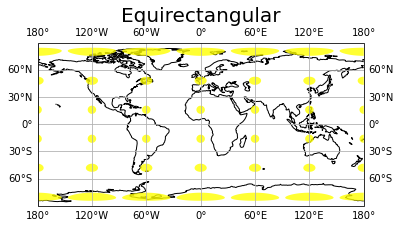

In [33]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)

ax.tissot(facecolor='yellow', alpha=0.8)

plt.title('Equirectangular', fontsize=20)
plt.show()

Cartopy supports only Plate Carree, not Equidistant Cylindrical with standard parallels, as far as I can tell:

see e.g. https://scitools.org.uk/cartopy/docs/v0.13/crs/projections.html 

```
class cartopy.crs.PlateCarree(central_longitude=0.0, globe=None)
```

one can use basemap 

see also https://www.net-analysis.com/blog/notebooks/AllProjectionsNotebook.html

-150
-60
-30
0
30
60
-120
-60
-30
0
30
60
-90
-60
-30
0
30
60
-60
-60
-30
0
30
60
-30
-60
-30
0
30
60


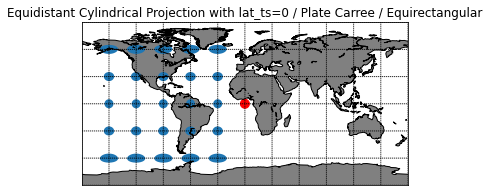

In [34]:
import os
os.environ["PROJ_LIB"] = "~/miniconda3/envs/datas/share"; #fixr


from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c', lat_ts=0)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white')

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,30.))
plt.title("Equidistant Cylindrical Projection with lat_ts=0 / Plate Carree / Equirectangular")

# tissot (centered at equator)
m.tissot(0, 0, 5, 30, color="red")

# plot all tissot every 30 deg
for lon in [-150, -120, -90, -60, -30]:
    print(lon)
    for lat in [-60, -30, 0, 30, 60]:
        print(lat)
        m.tissot(lon, lat, 5, 30)
        
plt.show()

-150
-60
-30
0
30
60
-120
-60
-30
0
30
60
-90
-60
-30
0
30
60
-60
-60
-30
0
30
60
-30
-60
-30
0
30
60


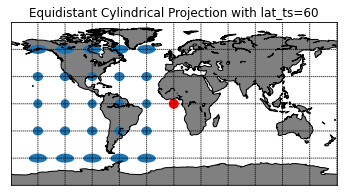

In [35]:
import os
os.environ["PROJ_LIB"] = "~/miniconda3/envs/datas/share"; #fixr


from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 3))

# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
m = Basemap(projection='cyl',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c', lat_ts=30)
m.drawcoastlines()
m.fillcontinents(color='grey',lake_color='white')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,30.))
# m.drawmapboundary(fill_color='aqua')
plt.title("Equidistant Cylindrical Projection with lat_ts=60")

# tissot (centered at equator)
m.tissot(0, 0, 5, 30, color="red")

# plot all tissot every 30 deg
for lon in [-150, -120, -90, -60, -30]:
    print(lon)
    for lat in [-60, -30, 0, 30, 60]:
        print(lat)
        m.tissot(lon, lat, 5, 30)
        
plt.show()

# Doing it by hand with hand made functions based on Snyder (1987) 

Equidistant Cylindrical and Sinuoisodal on a sphere, as example (see formulas above)

In [36]:
from numpy import cos

# Direct formulas for equirectangular
def direct_eqc(lon, lat, lat_ts):
    eastings_eqc = R*(lon - lon_0)*cos(lat_ts)
    northings_eqc = R*lat
    return(eastings_eqc, northings_eqc)

# Inverse formulas for equirectangular
def inverse_eqc(eastings, northings, lat_ts):
    lat = northings/R
    lon = lon_0 + eastings/(R*cos(lat_ts))
    return(lon, lat)



# Direct formulas for sinusoidal
def direct_sinu(lon, lat, lon_0):
    eastings_sinu = R*(lon - lon_0)*cos(lat)
    northings_sinu = R*lat
    return(eastings_sinu, northings_sinu)

# Inverse formulas for sinusoidal
def inverse_sinu(eastings, northings, lon_0):
    lat = northings/R
    lon = lon_0 + eastings/(R*cos(lat))
    return(lon, lat)

In [37]:
from math import pi

# map projection parameters for Jezero 
lon_0 = 0 # central longitude
lat_0 = 0 # central latitude
x_0 = 0 # false eastings
y_0 = 0 # false northings 
# R = 3396190 #Mars semi-major axisof IAU2000 Mars ellipsoid A=3396190 m B=3376200 m
R = 6378000.0 # Earth

lat_ts_deg = 35 # default latitiude of true scale at equator / Plate Carree
lat_ts = 35*(pi/180)

# additional parameter for Mars2020 team:
# lat_ts_mars2020_deg = 18.4663
# lat_ts_mars2020 = lat_ts_mars2020_deg*(pi/180)


In [38]:
!ls ./shorelines/ne_10m_coastline/

ne_10m_coastline.README.html ne_10m_coastline.prj
ne_10m_coastline.VERSION.txt ne_10m_coastline.shp
ne_10m_coastline.cpg         ne_10m_coastline.shx
ne_10m_coastline.dbf


Data come from either:

https://www.naturalearthdata.com/downloads/10m-physical-vectors/

or 

https://www.ngdc.noaa.gov/mgg/shorelines/shorelines.html

in this case we use the Natural Earth low-res coastlines.

In [39]:
import geopandas as gpd
df = gpd.read_file('./shorelines/ne_10m_coastline/ne_10m_coastline.shp')
# df = gpd.read_file('https://github.com/nvkelso/natural-earth-vector/blob/ca96624a56bd078437bca8184e78163e5039ad19/10m_cultural/ne_10m_admin_0_antarctic_claim_limit_lines.shp')
points = df.explode().reset_index()

# decimate the coastline 

# see also https://www.practicaldatascience.org/html/gis_geopandas.html
# see also https://geopandas.org/en/stable/docs/user_guide/mapping.html


In [40]:
points.head()

,level_0,level_1,featurecla,scalerank,min_zoom,geometry
0,0,0,Coastline,0,0.0,"LINESTRING (59.91603 -67.40049, 59.67856 -67.3..."
1,1,0,Coastline,0,0.0,"LINESTRING (-51.73062 -82.06260, -52.18688 -82..."
2,2,0,Coastline,6,5.0,"LINESTRING (166.13697 -50.86435, 166.10711 -50..."
3,3,0,Coastline,0,0.0,"LINESTRING (-56.66832 -36.73642, -56.66487 -36..."
4,4,0,Coastline,0,0.0,"LINESTRING (-51.07939 3.49209, -51.09648 3.449..."


In [41]:
# get the linestring vertices into points
from shapely.geometry import Point
points['geometry'] = points.apply(lambda x: Point(x.geometry.coords[0]), axis=1)


In [42]:
# OPTIOONAL Subsample

# points = points.sample(frac=1/10)


In [43]:
points.head()

,level_0,level_1,featurecla,scalerank,min_zoom,geometry
0,0,0,Coastline,0,0.0,POINT (59.91603 -67.40049)
1,1,0,Coastline,0,0.0,POINT (-51.73062 -82.06260)
2,2,0,Coastline,6,5.0,POINT (166.13697 -50.86435)
3,3,0,Coastline,0,0.0,POINT (-56.66832 -36.73642)
4,4,0,Coastline,0,0.0,POINT (-51.07939 3.49209)


<AxesSubplot:>

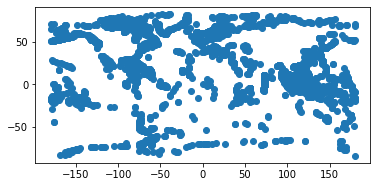

In [44]:
points.plot(figsize=(6, 3))

In [45]:
# lon and lat should be in radians for the formulas of Snyder (1987) to work
from math import pi

points['lon_radians'] = points.geometry.x*(pi/180)
points['lat_radians'] = points.geometry.y*(pi/180)

In [46]:
points.head()

,level_0,level_1,featurecla,scalerank,min_zoom,geometry,lon_radians,lat_radians
0,0,0,Coastline,0,0.0,POINT (59.91603 -67.40049),1.045732,-1.176360
1,1,0,Coastline,0,0.0,POINT (-51.73062 -82.06260),-0.902870,-1.432262
2,2,0,Coastline,6,5.0,POINT (166.13697 -50.86435),2.899637,-0.887750
3,3,0,Coastline,0,0.0,POINT (-56.66832 -36.73642),-0.989049,-0.641172
4,4,0,Coastline,0,0.0,POINT (-51.07939 3.49209),-0.891503,0.060948


In [47]:
# equirectangular 
points['eastings_equirectangular'] = direct_eqc(points.lon_radians, points.lat_radians, 0)[0]
points['northings_equirectangular'] = direct_eqc(points.lon_radians, points.lat_radians, 0)[1]

# equidistant cylindrical with latitude of true scale set
points['eastings_with_standard_parallel'] = direct_eqc(points.lon_radians, points.lat_radians, lat_ts)[0]
points['northings_with_standard_parallel'] = direct_eqc(points.lon_radians, points.lat_radians, lat_ts)[1]
                                                     
# Set the central meridian for the projection
lon_0 = 0.0

# sinusoidal
points['eastings_sinusoidal'] = direct_sinu(points['lon_radians'].values, points['lat_radians'].values, lon_0)[0]
points['northings_sinusoidal'] = direct_sinu(points['lon_radians'].values, points['lat_radians'].values, lon_0)[1]



In [48]:
points.head()

,level_0,level_1,featurecla,scalerank,min_zoom,geometry,lon_radians,lat_radians,eastings_equirectangular,northings_equirectangular,eastings_with_standard_parallel,northings_with_standard_parallel,eastings_sinusoidal,northings_sinusoidal
0,0,0,Coastline,0,0.0,POINT (59.91603 -67.40049),1.045732,-1.176360,6.669678e+06,-7.502827e+06,5.463481e+06,-7.502827e+06,2.563074e+06,-7.502827e+06
1,1,0,Coastline,0,0.0,POINT (-51.73062 -82.06260),-0.902870,-1.432262,-5.758503e+06,-9.134970e+06,-4.717089e+06,-9.134970e+06,-7.951983e+05,-9.134970e+06
2,2,0,Coastline,6,5.0,POINT (166.13697 -50.86435),2.899637,-0.887750,1.849389e+07,-5.662072e+06,1.514930e+07,-5.662072e+06,1.167257e+07,-5.662072e+06
3,3,0,Coastline,0,0.0,POINT (-56.66832 -36.73642),-0.989049,-0.641172,-6.308154e+06,-4.089392e+06,-5.167337e+06,-4.089392e+06,-5.055326e+06,-4.089392e+06
4,4,0,Coastline,0,0.0,POINT (-51.07939 3.49209),-0.891503,0.060948,-5.686009e+06,3.887290e+05,-4.657706e+06,3.887290e+05,-5.675451e+06,3.887290e+05


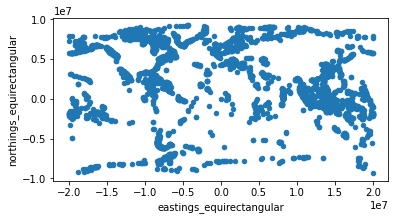

In [49]:
import matplotlib.pyplot as plt

points.plot.scatter(x="eastings_equirectangular", y="northings_equirectangular", figsize=(6, 3))
plt.show()


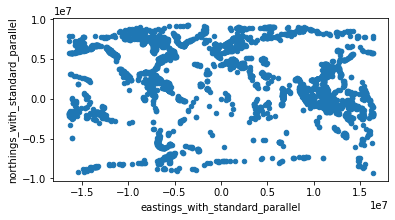

In [50]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(15, 10))

points.plot.scatter(x="eastings_with_standard_parallel", y="northings_with_standard_parallel", figsize=(6, 3))
plt.show()

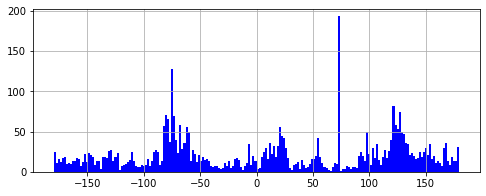

In [51]:
plt.figure(figsize=(8, 3))

ax1 = points.geometry.x.hist(color="blue", bins=200)


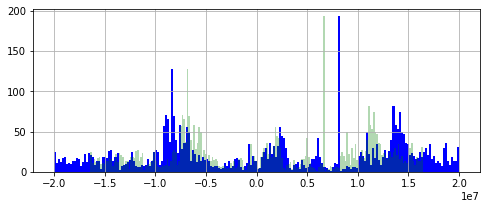

In [52]:
plt.figure(figsize=(8, 3))

ax1 = points["eastings_equirectangular"].hist(color="blue", bins=200)
ax2 = points["eastings_with_standard_parallel"].hist(color="green", bins=200, alpha=0.3)

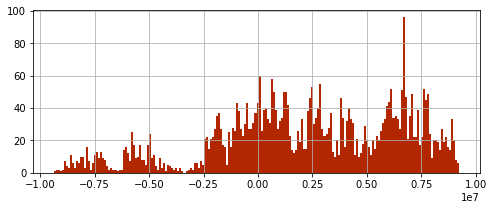

In [53]:
plt.figure(figsize=(8, 3))


ax1 = points["northings_equirectangular"].hist(color="red", bins=200)
ax2 = points["northings_with_standard_parallel"].hist(color="green", bins=200, alpha=0.3)

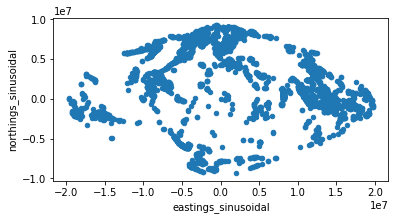

In [54]:
import matplotlib.pyplot as plt

# plt.figure(figsize=(6, 3))

points.plot.scatter(x="eastings_sinusoidal", y="northings_sinusoidal", figsize=(6, 3))
plt.show()

# Equal Area Cylindrical (Lambert Cylindrical)

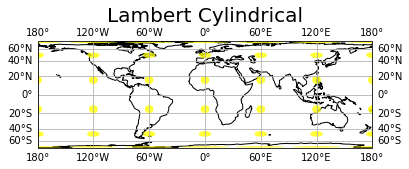

In [55]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.LambertCylindrical())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)

ax.tissot(facecolor='yellow', alpha=0.8)

# plt.suptitle('test title', fontsize=20)

plt.title('Lambert Cylindrical', fontsize=20)
plt.show()

# Orthographic

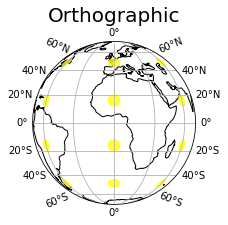

In [56]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.cartopy.crs.Orthographic())
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
# ax.contourf(lon, lat, data, cmap='gray')  # didn't use transform, but looks ok...

ax.tissot(facecolor='yellow', alpha=0.8)

# plt.suptitle('test title', fontsize=20)

plt.title('Orthographic', fontsize=20)
plt.show()

# Stereographic

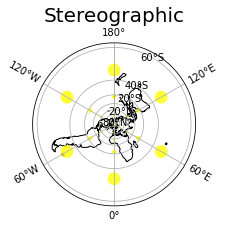

In [57]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.cartopy.crs.Stereographic(central_latitude=90.0, central_longitude=0.0))
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
# ax.contourf(lon, lat, data, cmap='gray')  # didn't use transform, but looks ok...

ax.tissot(facecolor='yellow', alpha=0.8)

# plt.suptitle('test title', fontsize=20)

plt.title('Stereographic', fontsize=20)
plt.show()

# Sinusoidal

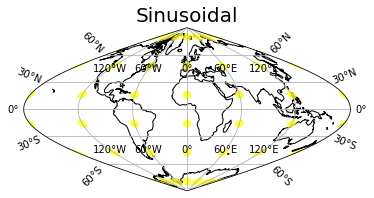

In [58]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt


# The projection keyword determines how the plot will look
plt.figure(figsize=(6, 3))
ax = plt.axes(projection=ccrs.cartopy.crs.Sinusoidal(central_longitude=0.0))
ax.set_global()
ax.coastlines()
ax.gridlines(draw_labels=True)
# ax.contourf(lon, lat, data, cmap='gray')  # didn't use transform, but looks ok...

ax.tissot(facecolor='yellow', alpha=0.8)

# plt.suptitle('test title', fontsize=20)

plt.title('Sinusoidal', fontsize=20)
plt.show()